In [ ]:
CHAR_VECTOR = "abcdefghijklmnoqqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-_$"

letters = [letter for letter in CHAR_VECTOR]

num_classes = len(letters) + 1

img_w, img_h = 128, 64

# Network parameters
batch_size = 128
val_batch_size = 16

downsample_factor = 4
max_text_len = 50

In [ ]:
# char_list:   'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# total number of our output classes: len(char_list)
char_list = "abcdefghijklmnoqqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-_$"
 
def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst
import os
import fnmatch
import cv2
import numpy as np
import string
import time

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
train_dir = "/content/drive/MyDrive/minidata1"
val_dir ="/content/drive/MyDrive/minidat"
 
 
# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
 
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []
 
max_label_len = 0
 
i =1 
flag = 0
 
for root, dirnames, filenames in os.walk(train_dir):
 
    for f_name in fnmatch.filter(filenames, '*.jpg'):
        # read input image and convert into gray scale image
        img = cv2.cvtColor(cv2.imread(os.path.join(root, f_name)), cv2.COLOR_BGR2GRAY)   
 
        # convert each image of shape (32, 128, 1)
        w, h = img.shape
        if h > 128 or w > 32:
            continue
        if w < 32:
            add_zeros = np.ones((32-w, h))*255
            img = np.concatenate((img, add_zeros))
 
        if h < 128:
            add_zeros = np.ones((32, 128-h))*255
            img = np.concatenate((img, add_zeros), axis=1)
        img = np.expand_dims(img , axis = 2)
        
        # Normalize each image
        img = img/255.
        
        # get the text from the image
        txt = f_name.split('_')[1]
        
        # compute maximum length of the text
        if len(txt) > max_label_len:
            max_label_len = len(txt)
            
           
      
            orig_txt.append(txt)   
            train_label_length.append(len(txt))
            train_input_length.append(31)
            training_img.append(img)
            training_txt.append(encode_to_labels(txt)) 
              # break the loop if total data is 150000
        if i == 5000:
            flag = 1
            break
        i+=1
    if flag == 1:
        break
 
j =1 
flag1 = 0
max_label_len1=0
for root, dirnames, filenames in os.walk(val_dir):
 
    for f_name in fnmatch.filter(filenames, '*.jpg'):
        # read input image and convert into gray scale image
        img = cv2.cvtColor(cv2.imread(os.path.join(root, f_name)), cv2.COLOR_BGR2GRAY)   
 
        # convert each image of shape (32, 128, 1)
        w, h = img.shape
        if h > 128 or w > 32:
            continue
        if w < 32:
            add_zeros = np.ones((32-w, h))*255
            img = np.concatenate((img, add_zeros))
 
        if h < 128:
            add_zeros = np.ones((32, 128-h))*255
            img = np.concatenate((img, add_zeros), axis=1)
        img = np.expand_dims(img , axis = 2)
        
        # Normalize each image
        img = img/255.
        
        # get the text from the image
        txt = f_name.split('_')[1]
        
        # compute maximum length of the text
        if len(txt) > max_label_len1:
            max_label_len1 = len(txt)
       
        valid_orig_txt.append(txt)   
        valid_label_length.append(len(txt))
        valid_input_length.append(31)
        valid_img.append(img)
        valid_txt.append(encode_to_labels(txt))
       
        if j == 3000:
            flag1 = 1
            break
        j+=1
    if flag1 == 1:
        break

p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p
p


In [ ]:
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = len(char_list))
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = len(char_list))
print(train_padded_txt)

[[45 17 14 20 13  2  4 65 65 65 65 65 65 65 65 65 65]
 [28  0 13 21  0 18  8 13  6 65 65 65 65 65 65 65 65]
 [31  0 13 19  0 18  8 25  4  3 65 65 65 65 65 65 65]
 [ 2 14 17 17  4 18 14 13  3  4 13 19 65 65 65 65 65]
 [44  2  7 14 14 11  2  7  8 11  3 17  4 13 65 65 65]
 [28 14 13  6 17  4  6  0 19  8 14 13  0 11  8 18 19]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)
act_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 128, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 128, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 32, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 32, 256)        295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 256)        590080

In [ ]:

labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
 
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')
filepath="CRNN_model.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)
train_label_length = np.array(train_label_length)

valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length)
valid_label_length = np.array(valid_label_length)

In [ ]:
batch_size = 256
epochs = 128
step_per_epoch= 16
hist = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], y=np.zeros(len(training_img)), batch_size=batch_size, epochs = epochs, validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]), verbose = 1, callbacks = callbacks_list)

Epoch 1/128
1/1 [==============================] - 60s 60s/step - loss: 55.1018 - val_loss: 46.6539

Epoch 00001: val_loss improved from 105.13238 to 46.65385, saving model to CRNN_model.hdf5
Epoch 2/128
1/1 [==============================] - 60s 60s/step - loss: 46.9175 - val_loss: 32.2533

Epoch 00002: val_loss improved from 46.65385 to 32.25334, saving model to CRNN_model.hdf5
Epoch 3/128
1/1 [==============================] - 60s 60s/step - loss: 46.1675 - val_loss: 30.9495

Epoch 00003: val_loss improved from 32.25334 to 30.94949, saving model to CRNN_model.hdf5
Epoch 4/128
1/1 [==============================] - 60s 60s/step - loss: 43.0742 - val_loss: 30.5731

Epoch 00004: val_loss improved from 30.94949 to 30.57312, saving model to CRNN_model.hdf5
Epoch 5/128
1/1 [==============================] - 60s 60s/step - loss: 40.2811 - val_loss: 30.5864

Epoch 00005: val_loss did not improve from 30.57312
Epoch 6/128
1/1 [==============================] - 60s 60s/step - loss: 39.1383 - 

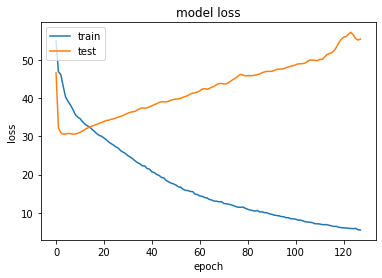

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# load the saved best model weights
act_model.load_weights('/content/CRNN_model.hdf5')
 
# predict outputs on validation images
prediction = act_model.predict(valid_img[:10])
 
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
 
# see the results
i = 0
for x in out:
    print("original_text =  ", valid_orig_txt[i])
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1

original_text =   APOPLEXIES
predicted text = 

original_text =   overran
predicted text = 

original_text =   wesleyan
predicted text = 

original_text =   admirals
predicted text = 

original_text =   Pledge
predicted text = 

original_text =   Agate
predicted text = 

original_text =   Catalyst
predicted text = 

original_text =   MOUE
predicted text = 

original_text =   Contemplating
predicted text = 

original_text =   TALLYHOED
predicted text = 

